In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the dataset
mental_data = pd.read_csv('/kaggle/input/mental-health-dataset/Mental Health Dataset.csv')

df = mental_data.copy()  # make a copy of the dataset
df.head()

,Timestamp,Gender,Country,Occupation,self_employed,family_history,treatment,Days_Indoors,Growing_Stress,Changes_Habits,Mental_Health_History,Mood_Swings,Coping_Struggles,Work_Interest,Social_Weakness,mental_health_interview,care_options
0,8/27/2014 11:29,Female,United States,Corporate,NaN,No,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Not sure
1,8/27/2014 11:31,Female,United States,Corporate,NaN,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,No
2,8/27/2014 11:32,Female,United States,Corporate,NaN,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Yes
3,8/27/2014 11:37,Female,United States,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,Maybe,Yes
4,8/27/2014 11:43,Female,United States,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Yes


# Data Cleaning

In [3]:
df.info()  # has 292364 rows and 17 columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 292364 entries, 0 to 292363
Data columns (total 17 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   Timestamp                292364 non-null  object
 1   Gender                   292364 non-null  object
 2   Country                  292364 non-null  object
 3   Occupation               292364 non-null  object
 4   self_employed            287162 non-null  object
 5   family_history           292364 non-null  object
 6   treatment                292364 non-null  object
 7   Days_Indoors             292364 non-null  object
 8   Growing_Stress           292364 non-null  object
 9   Changes_Habits           292364 non-null  object
 10  Mental_Health_History    292364 non-null  object
 11  Mood_Swings              292364 non-null  object
 12  Coping_Struggles         292364 non-null  object
 13  Work_Interest            292364 non-null  object
 14  Social_Weakness     

In [4]:
df.describe()

,Timestamp,Gender,Country,Occupation,self_employed,family_history,treatment,Days_Indoors,Growing_Stress,Changes_Habits,Mental_Health_History,Mood_Swings,Coping_Struggles,Work_Interest,Social_Weakness,mental_health_interview,care_options
count,292364,292364,292364,292364,287162,292364,292364,292364,292364,292364,292364,292364,292364,292364,292364,292364,292364
unique,580,2,35,5,2,2,2,5,3,3,3,3,2,3,3,3,3
top,8/27/2014 11:43,Male,United States,Housewife,No,No,Yes,1-14 days,Maybe,Yes,No,Medium,No,No,Maybe,No,No
freq,2384,239850,171308,66351,257994,176832,147606,63548,99985,109523,104018,101064,154328,105843,103393,232166,118886


In [5]:
# Percentage of Missing values
(df.isnull().mean()*100).round(1)

Timestamp                  0.0
Gender                     0.0
Country                    0.0
Occupation                 0.0
self_employed              1.8
family_history             0.0
treatment                  0.0
Days_Indoors               0.0
Growing_Stress             0.0
Changes_Habits             0.0
Mental_Health_History      0.0
Mood_Swings                0.0
Coping_Struggles           0.0
Work_Interest              0.0
Social_Weakness            0.0
mental_health_interview    0.0
care_options               0.0
dtype: float64

In [6]:
# Drop rows with missing values in 'self_employed' column
df = df.dropna(subset=['self_employed'])

print(df.isnull().sum())

Timestamp                  0
Gender                     0
Country                    0
Occupation                 0
self_employed              0
family_history             0
treatment                  0
Days_Indoors               0
Growing_Stress             0
Changes_Habits             0
Mental_Health_History      0
Mood_Swings                0
Coping_Struggles           0
Work_Interest              0
Social_Weakness            0
mental_health_interview    0
care_options               0
dtype: int64


In [7]:
# Check for Percentage of Duplicated rows
duplicates = df.duplicated().mean()
print(f" Percentage of duplicates: {duplicates: .1%}")
print()  # blank line

# Drop duplicated rows
df = df.drop_duplicates()
duplicated = df.duplicated().mean()
print(f" Percentage of duplicated: {duplicated: .1%}")

 Percentage of duplicates:  0.8%

 Percentage of duplicated:  0.0%


# 1. Gender Distribution in Mental Health Data by Country

<function matplotlib.pyplot.show(close=None, block=None)>

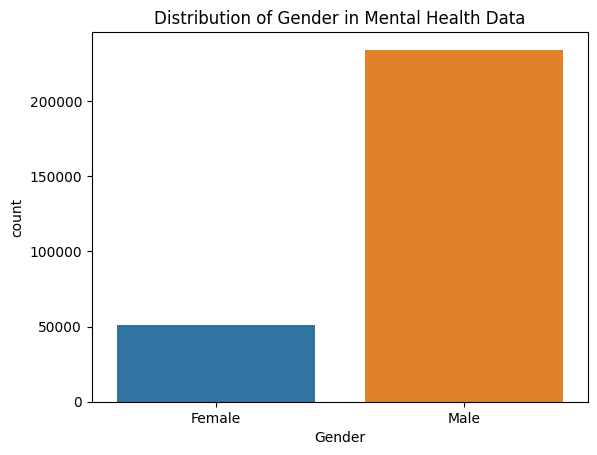

In [8]:
# Distribution of Gender in Mental Health Data
sns.countplot(x= 'Gender', data= df)
plt.title('Distribution of Gender in Mental Health Data')
plt.show

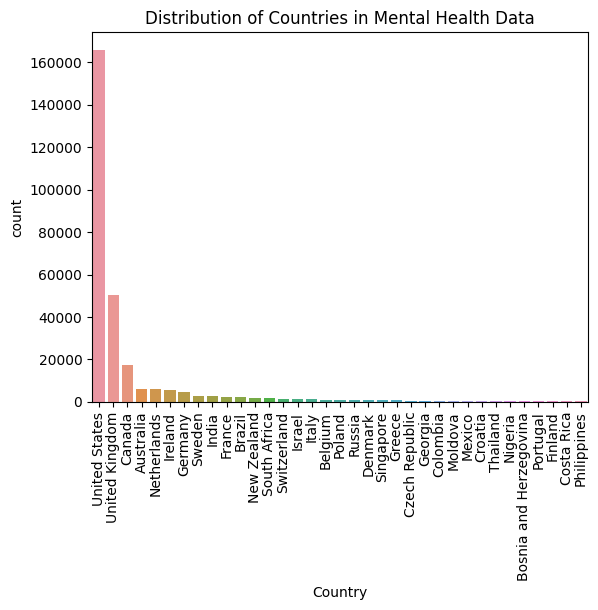

In [9]:
# Distribution of Countries in Mental Health Data
sns.countplot(x = 'Country',data= df, order= df['Country'].value_counts().index)
plt.xticks(rotation=90)  # Rotate x-axis labels after creating the plot
plt.title('Distribution of Countries in Mental Health Data')
plt.show()

In [10]:
# Group data by country and calculate gender counts
gender_counts = df.groupby('Country')['Gender'].value_counts().unstack(fill_value=0)

# Calculate total counts per country
gender_counts['Total'] = gender_counts.sum(axis=1)

# Sort the table by the 'Total' column in descending order
sorted_gender_counts = gender_counts.sort_values(by='Total', ascending=False)
sorted_gender_counts

Gender,Female,Male,Total
Country,,,
United States,34049,131820,165869
United Kingdom,6896,43680,50576
Canada,3879,13650,17529
Australia,1724,4290,6014
Netherlands,431,5460,5891
Ireland,862,4680,5542
Germany,0,4680,4680
Sweden,862,1950,2812
India,431,2340,2771


# Insights from Analysis 1

The number of female participants in the survey is quite a bit lower than male participants. As such, we will need to proportionalize the data to prevent underrepresentation. 

We can also see that the distribution of participants across countries is highly uneven. This will need to be considered as we further explore the data.

# 2. Relationship between Gender, Occupations, and Mood Swings

In order to better pinpoint an effective data mining algorithm, I will explore potential relationships that exist between gender, occupation, and the presence of mood swings.

# Proportion of Growing Stress within each Gender

Gender
Male      234000
Female     50858



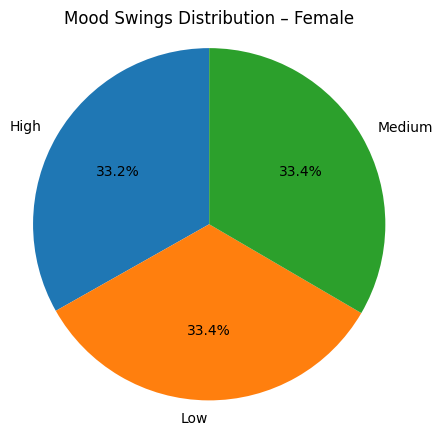

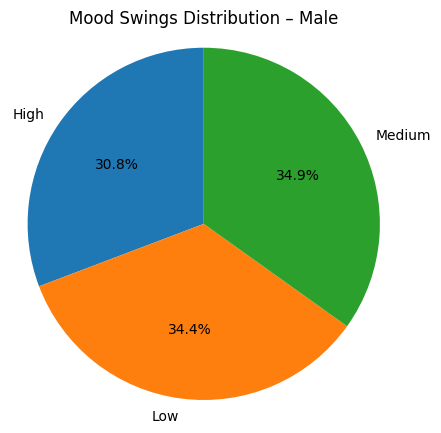

In [11]:
# Calculate total counts of responses for each Gender
gender_mood_swings_counts = df['Gender'].value_counts()
print(gender_mood_swings_counts.to_string())
print()  # blank line

# Proportion of Growing Stress within each Gender
gender_mood_swings_prop = df.groupby('Gender')['Mood_Swings'].value_counts().unstack().div(gender_mood_swings_counts, axis=0)
gender_mood_swings_prop

import matplotlib.pyplot as plt

# Create one pie chart per Gender group
for gender in gender_mood_swings_prop.index:
    plt.figure(figsize=(5,5))
    
    values = gender_mood_swings_prop.loc[gender]
    labels = values.index
    
    plt.pie(values, labels=labels, autopct='%1.1f%%', startangle=90)
    plt.title(f"Mood Swings Distribution – {gender}")
    plt.axis('equal')  # keeps the pie circular
    
    plt.show()

# Gender Differences in Mood Swings Across Occupations

# Group by Gender and Occupation, calculate counts for Mood Swings



In [12]:
occupation_gender_mood_swings= df.groupby(['Occupation','Gender'])['Mood_Swings'].value_counts().unstack(fill_value=0)
occupation_gender_mood_swings

Mood_Swings         High    Low  Medium
Occupation Gender                      
Business   Female   3068   3422    2832
           Male    10200  12000   17400
Corporate  Female   2950   2242    3422
           Male    12600  15000   23400
Housewife  Female   4130   3540    3658
           Male    13800  22200   17400
Others     Female   3304   3422    3304
           Male    12600  17400   11400
Student    Female   3422   4366    3776
           Male    22800  13800   12000

# Proportions of Growing Stress by Occupation & Gender

In [13]:
# Calculate total counts per Occupation and Gender combination
occupation_gender_mood_swings['Total'] = occupation_gender_mood_swings.sum(axis=1)

# Calculate proportions for Growing Stress within each Occupation and Gender group
occupation_gender_mood_swings = occupation_gender_mood_swings.div(occupation_gender_mood_swings['Total'], axis=0)

# Drop the 'Total' column as it's not needed for proportions
occupation_gender_mood_swings_prop = occupation_gender_mood_swings.drop('Total', axis=1)
occupation_gender_mood_swings_prop

Mood_Swings            High       Low    Medium
Occupation Gender                              
Business   Female  0.329114  0.367089  0.303797
           Male    0.257576  0.303030  0.439394
Corporate  Female  0.342466  0.260274  0.397260
           Male    0.247059  0.294118  0.458824
Housewife  Female  0.364583  0.312500  0.322917
           Male    0.258427  0.415730  0.325843
Others     Female  0.329412  0.341176  0.329412
           Male    0.304348  0.420290  0.275362
Student    Female  0.295918  0.377551  0.326531
           Male    0.469136  0.283951  0.246914

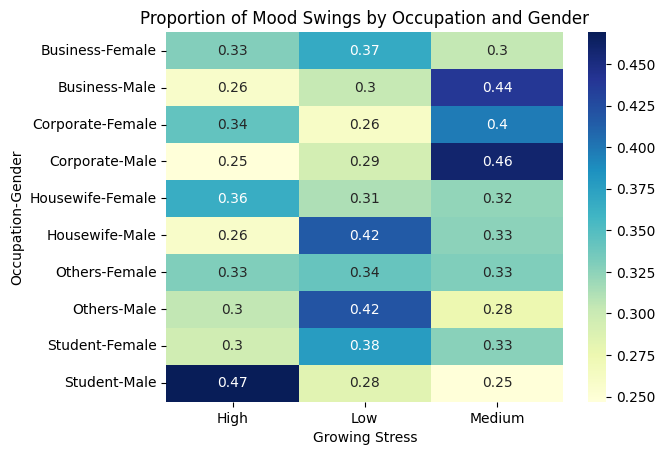

In [14]:
# Heatmap showing the Proportion of Growing Stress by Occupation and Gender
sns.heatmap(occupation_gender_mood_swings_prop, annot=True, cmap="YlGnBu")  
plt.xlabel("Growing Stress")
plt.ylabel("Occupation-Gender")
plt.title("Proportion of Mood Swings by Occupation and Gender")
plt.show()

# Insights

Women in corporate/business positions are seeing high levels of mood swings, but overall, male students and office workers are experiencing the highest rates.

# 3. Relationship Between Mental Health History, Growing Stress and Treatment Seeking Among Students by Country

# Co-occurrence of Mental Health History and Growing Stress in Students

I'll use crosstabulation to reveal potential relationships.

Mood_Swings            High   Low  Medium
Mental_Health_History                    
Maybe                  9580  6688    3816
No                     9462  6216    6816
Yes                    7180  5262    5144



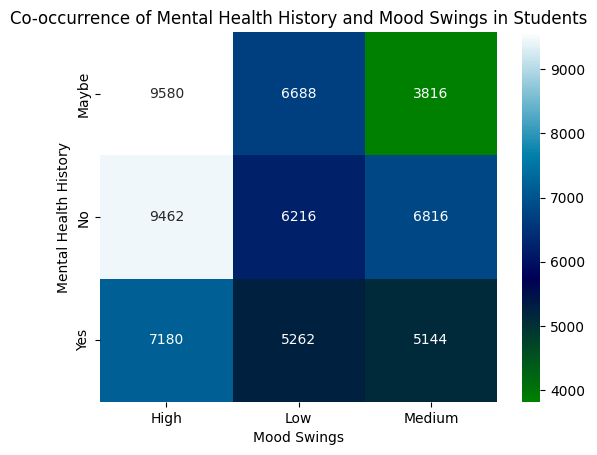

In [15]:
# Filter data for Students only 
student_data = df[df['Occupation'] == 'Student']

# Create a crosstabulation table
mental_health_stress_crosstab = pd.crosstab(student_data["Mental_Health_History"], student_data["Mood_Swings"])

# Print the crosstabulation table
print(mental_health_stress_crosstab)
print()  # blank line

# Generate a heatmap using seaborn
sns.heatmap(mental_health_stress_crosstab, annot=True, cmap="ocean", fmt=".0f")
plt.xlabel("Mood Swings")
plt.ylabel("Mental Health History")
plt.title("Co-occurrence of Mental Health History and Mood Swings in Students")
plt.show()

We can see a high rate of mood swings from students that have amibigous/no mental health history (an important factor in determining treatment-seeking behavior!)

# Treatment-Seeking Behavior Among Students by Country and Growing Stress

In [16]:
# Group by Country and Growing Stress, calculate counts for treatment
treatment_by_country_stress = student_data.groupby(['Country', 'Growing_Stress'])['treatment'].value_counts().unstack(fill_value=0)

print('Treatment-Seeking Behaviour Among Students by Country and Growing Stress:')
print() # blank line

treatment_by_country_stress   # use print(treatment_by_country_stress.to_string()) instead to get the full Dataframe)

Treatment-Seeking Behaviour Among Students by Country and Growing Stress:



treatment                        No   Yes
Country        Growing_Stress            
Australia      Maybe            190   273
               No               136   228
               Yes              177   279
Belgium        Maybe             58     0
               No                56     0
...                             ...   ...
United Kingdom No              1416  1400
               Yes             1902  1826
United States  Maybe           6177  6952
               No              4244  5360
               Yes             5620  6767

[105 rows x 2 columns]

# Insights

A large number of students reported having a history of mental health issues. It points towards a need to bolster resources for students.

Students in developed nations are more likely to seek treatment, regardless of mental health history or stress levels. 

# 4. Treatment-Seeking Behaviour: A Comparative Analysis of Men and Women

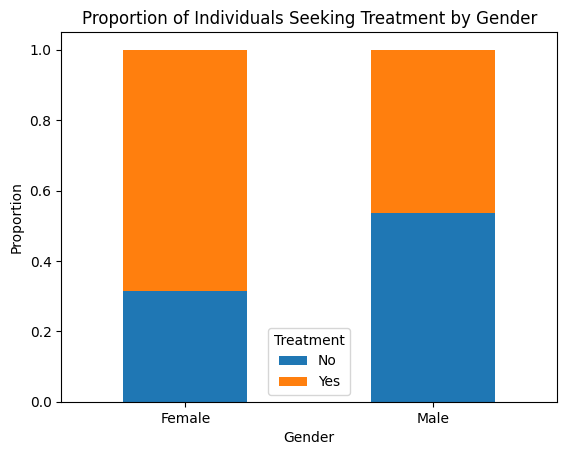

In [17]:
# Examine the relationship between gender and treatment-seeking
treatment_by_gender = pd.crosstab(df['Gender'], df['treatment'])

# Calculate proportions of treatment-seeking by gender for a clearer comparison
treatment_by_gender_prop = treatment_by_gender.div(treatment_by_gender.sum(1), axis=0)

# Barplot of the proportions of individuals seeking treatment by gender
treatment_by_gender_prop.plot(kind='bar', stacked=True)
plt.title('Proportion of Individuals Seeking Treatment by Gender')
plt.ylabel('Proportion')
plt.xlabel('Gender')
plt.xticks(rotation=0)
plt.legend(title='Treatment', labels=['No', 'Yes'])
plt.show()

Women are more likely to seek treatment.

# Preprocessing

In [18]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    classification_report,
    confusion_matrix,
    roc_curve,
    auc,
    RocCurveDisplay,
)

# Create a LabelEncoder object
le = LabelEncoder()

# Apply LabelEncoder to each column
encoded_df = df.apply(le.fit_transform)

encoded_df.head()

,Timestamp,Gender,Country,Occupation,self_employed,family_history,treatment,Days_Indoors,Growing_Stress,Changes_Habits,Mental_Health_History,Mood_Swings,Coping_Struggles,Work_Interest,Social_Weakness,mental_health_interview,care_options
3,41,0,34,1,0,1,1,0,2,1,2,2,0,1,2,0,2
4,46,0,34,1,0,1,1,0,2,1,2,2,0,1,2,1,2
5,50,0,25,1,0,0,1,0,2,1,2,2,0,1,2,0,1
6,52,0,0,1,0,1,1,0,2,1,2,2,0,1,2,1,1
7,53,0,34,1,0,0,0,0,2,1,2,2,0,1,2,1,0


In [19]:
X = encoded_df.drop("Mood_Swings", axis = 1)

y = encoded_df["Mood_Swings"]
y

3         2
4         2
5         2
6         2
7         2
         ..
292359    1
292360    1
292361    1
292362    1
292363    1
Name: Mood_Swings, Length: 284858, dtype: int64

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(227886, 16) (56972, 16)
(227886,) (56972,)


Train shape: (233891, 16)
Test shape: (58473, 16)

Decision Tree Accuracy: 0.9643254151488722

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.96      0.96     18112
           1       0.98      0.98      0.98     20120
           2       0.96      0.95      0.96     20241

    accuracy                           0.96     58473
   macro avg       0.96      0.96      0.96     58473
weighted avg       0.96      0.96      0.96     58473



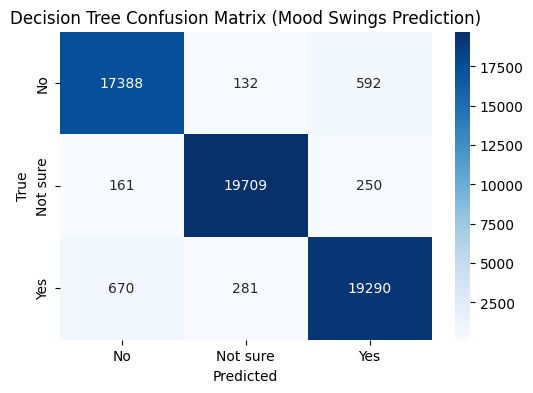

In [21]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# =========================
# LOAD DATA
# =========================
df = pd.read_csv('/kaggle/input/mental-health-dataset/Mental Health Dataset.csv')

# =========================
# LABEL ENCODING
# =========================
le = LabelEncoder()

# Apply LabelEncoder to each column
encoded_df = df.apply(le.fit_transform)

# =========================
# DEFINE FEATURES AND LABEL
# =========================
X = encoded_df.drop("Mood_Swings", axis=1)
y = encoded_df["Mood_Swings"]

# =========================
# TRAIN/TEST SPLIT
# =========================
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)

# =========================
# TRAIN DECISION TREE MODEL
# =========================
dt = DecisionTreeClassifier(
    random_state=42,
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1
)

dt.fit(X_train, y_train)

# =========================
# EVALUATE MODEL
# =========================
y_pred = dt.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("\nDecision Tree Accuracy:", accuracy)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# =========================
# CONFUSION MATRIX
# =========================
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=le.classes_,
            yticklabels=le.classes_)

plt.title("Decision Tree Confusion Matrix (Mood Swings Prediction)")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


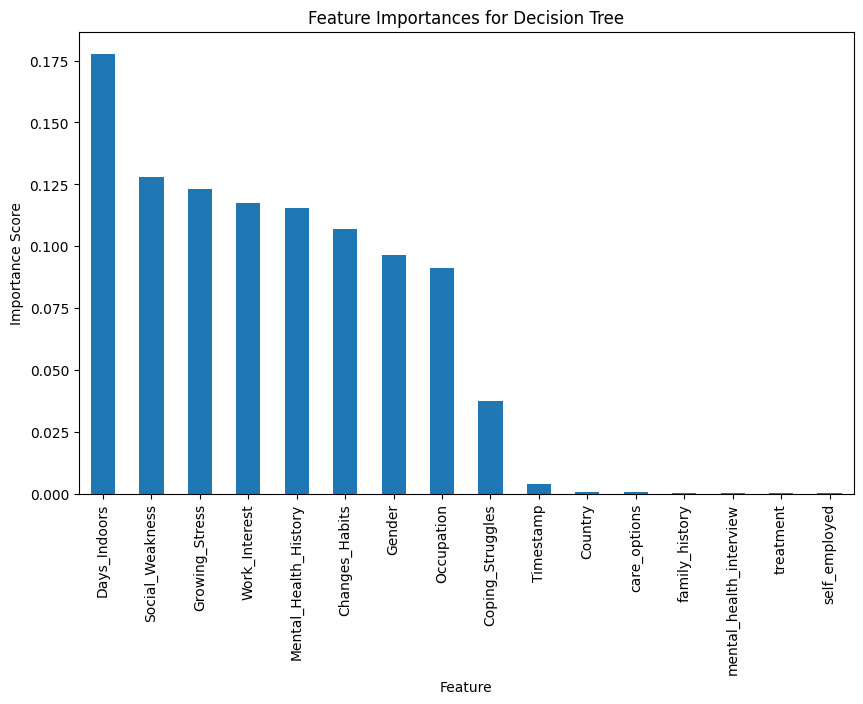

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

importances = pd.Series(dt.feature_importances_, index=X.columns)
importances = importances.sort_values(ascending=False)

plt.figure(figsize=(10, 6))
importances.plot(kind='bar')
plt.title("Feature Importances for Decision Tree")
plt.ylabel("Importance Score")
plt.xlabel("Feature")
plt.show()


In [23]:
# Create a small tree just for visualization
dt_small = DecisionTreeClassifier(
    max_depth=4,     # limit depth for visualization
    random_state=42
)
dt_small.fit(X_train, y_train)

plt.figure(figsize=(20, 10))
tree.plot_tree(
    dt_small,
    feature_names=X.columns,
    class_names=le.classes_,
    filled=True,
    rounded=True,
    fontsize=10
)
plt.show()


NameError: name 'tree' is not defined

<Figure size 2000x1000 with 0 Axes>